<a href="https://colab.research.google.com/github/DiegoRinconP/Mineria_de_datos/blob/main/Ej_Limpieza_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 1 - LIMPIEZA DE DATOS
**Equipo**: 2

**Grupo**: 002 Miércoles

**Integrantes**: 
*   1850231 Cid Sanabria Dulce Ximena
*   1851895 Ortiz Cruz Jaclyn Lizeth
*   1849687 Rincón Pacheco Diego Alejandro
*   1854410 Serrano Caballero Lizeth

## Netflix movies and TV shows
https://www.kaggle.com/shivamb/netflix-shows/version/4

**Importar librería y base de datos**

El primer paso es importar las librerías que se usarán en el proceso

In [ ]:
import pandas as pd
import numpy as np

Se carga la base de datos csv a archivos, para después llamarla y almacenarla en una variable

In [ ]:
bd=pd.read_csv('/content/netflix_titles.csv') #se manda llamar la base de datos original

**Visualizar los datos**

Lo primero que se deba hacer es analizar la base de datos cargada, para verificar que no hayan existido problemas al momento de llamarla

con la función shape se puede observar el número de filas y columnas de la base de datos

In [ ]:
bd.shape #regresa filas, columnas

(7787, 12)

Para ver como se forma la base de datos, las propiedades head y tail permiten mostrar las primeras 5 filas o las últimas 5 filas de la base de datos, respectivamente.



In [ ]:
bd.head() #enseña las primeras 5 filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
bd.tail() #enseña las últimas 5 filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Descripción básica de columnas**

Para observar las columnas que conforman la base de datos, se puede hacer uso del atributo columns, el cual regresa los nombres de las columnas.

In [ ]:
bd.columns #enseña las columnas que conforman la base de datos

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

 **Cambiar nombres de columnas**

 
En la siguiente línea de código se cambian el nombre de dos de las columnas de la base de datos, con uso del atributo rename.

In [ ]:
bd.rename(columns={'listed_in':'genre','show_id':'id'},inplace=True) #con el inplace se hace el cambio "permanente"

#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

Con el atributo dtypes, se puede observar de que tipo de dato estan compuestas cada una de las columnas de la base de datos.

In [ ]:
bd.dtypes #enseña el tipo de dato de cada columna de la base de datos

id              object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
genre           object
description     object
dtype: object

También se puede buscar el tipo de dato de una columna en específico con el atributo dtype.

In [ ]:
bd['genre'].dtype #enseña tipo de objeto de una columna en específico

dtype('O')

En la siguiente línea de código, se cambio el tipo de dato del contenido de una de las columnas, usando el atributo astype.

In [ ]:
bd.astype({'release_year':float}) #cambia el tipo de objeto de los datos de una columna en específico

bd['release_year'].dtype #verificando si el cambio de tipo de dato funciono

#https://www.it-swarm-es.com/es/python/cambiar-el-tipo-de-datos-de-las-columnas-en-pandas./1072113742/

dtype('int64')

In [ ]:
bd.head() #verificando los cambios realizados

,id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Con la siguiente línea de código, se elimina la columna "description", usando el atributo drop.

In [ ]:
bd.drop('description',axis=1,inplace=True) #se elimina la columna descripción de la base de datos

In [ ]:
bd.head() #verificando que se haya aplicado la línea de código anterior

,id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


Una parte importante de trabajar bases de datos es la identificación de datos nulos. Las siguientes líneas de código ejemplifican este proceso.

In [ ]:
bd.isnull().any() #devuleve la lista de columnas y los valores True o False, dependiendo si hay valores nulos o no en las columnas

id              False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
genre           False
dtype: bool

In [ ]:
bd.isnull().sum() #devuelve el total de valores nulos por columna

id                 0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genre              0
dtype: int64

Una vez identificados los datos nulos, se puede hacer uso del atributo dropna para poder eliminar las columnas o renglones que contengan dichos datos nulos. Para columnas se usa de argumento axis=1, mientras que en renglones axis=0.

In [ ]:
bd.dropna(axis=0,inplace=True) #elimina las filas que contengan datos nulos

In [ ]:
bd.shape #verificando que se haya aplicado la línea de código anterior al ver si ahora hay menos filas

(4808, 11)

**Clasificación de datos y Agrupación**

Otro aspecto importante a trabajar base de datos es agrupar los datos para tener un mejor manejo.


En la siguiente línea de código, se está identificando los valores que se contienen en la columna "type", usando el atributo unique.

In [ ]:
bd.type.unique() #nos arroja los datos únicos que aparecen en esa columna

array(['Movie', 'TV Show'], dtype=object)

Después de identificar los valores de la columna, se pueden filtrar los datos, como se muestra en el ejemplo que se estan guardando por "Movie" en una variable. Luego esa variable se puede guardar en un archivo csv para tener acceso a él.


In [ ]:
tipo_movie=bd[bd["type"]=='Movie'] #definir que información queremos guardar en la variable

tipo_movie.to_csv('Solo_Movie.csv',index=False)  #guardar los datos en csv

In [ ]:
tipo_movie.head() #analizando como queda la base de datos después del filtro

,id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies"


En la siguiente línea del código, se trabaja otra forma de filtrar los datos de una base de datos. En este caso se esta trabajando con la base que se creo de la línea anterior, usando el atributo loc para poder aplicar el nuevo filtro.

In [ ]:
movie_mx=tipo_movie.loc[tipo_movie.country=='Mexico'] #Forma de filtrar los datos siguiendo cierto criterio

In [ ]:
movie_mx.head() #verificando que se haya aplicado el filtro de la línea de código anterior

,id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
292,s293,Movie,Acapulco La vida va,Alfonso Serrano Maturino,"Patricio Castillo, Sergio Bustamante, Alejandr...",Mexico,"June 3, 2017",2016,TV-MA,89 min,"Comedies, Dramas, International Movies"
370,s371,Movie,Alan Saldaña: Mi vida de pobre,"Raúl Campos, Jan Suter",Alan Saldaña,Mexico,"August 4, 2017",2017,TV-MA,54 min,Stand-Up Comedy
378,s379,Movie,Alex Fernández: The Best Comedian in the World,Alex Díaz,Alex Fernández,Mexico,"January 23, 2020",2020,TV-MA,51 min,Stand-Up Comedy
420,s421,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,"January 3, 2020",2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies"


En la siguiente línea de código se muestra otra forma de usar el atributo loc. En este caso se estan guardando los valores de la columna "release_year" de los datos correspondientes a "TV Show" de la columna "type", en la variable TV_vs_Salida.

In [ ]:
TV_vs_salida = bd.loc[bd.type == 'TV Show'].release_year #se guardan los valores de la columna release_year correspondientes a TV Show de la columna type

In [ ]:
TV_vs_salida

5       2016
132     2019
218     2020
260     2018
276     2019
        ... 
7385    2020
7400    2016
7492    2018
7666    2017
7721    2019
Name: release_year, Length: 135, dtype: int64

## Preguntas de Interés

* ¿Para que me puede servir estas agrupaciones para la práctica siguiente?

Nos puede ayudar a mejorar la precisión de los modelos predictivos, y   la comprensión de la distribución de los datos.




* Importancia del análisis previo de los datos antes de iniciar las modificaciones

Es necesario hacer un recorrido por la base de datos para, de esta manera, poder decidir que información resulta útil para el proyecto. Si se empieza a modificar la información antes, podemos cometer el error de eliminar algún dato clave y quedarnos con información obsoleta o de poca relevancia.  



### Tareas de puntos extra
**1.-**Investigar los siguientes comandos: 
 
*   **df.dropna()**:El método dropna permite, de una forma muy conveniente,filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.
*   **df.astype**:Transmite un objeto pandas a un tipo de formato específico.

Ambas forman parte de la libreria "pandas" que nos ayuda en el manejo y análisis de estructuras de datos.
   

**2.-** Realizar una tarea de preprocesamiento no mencionada en esta práctica.

La librería matplotlib es una librería para la creación de gráficos de dos dimensiones.
A continuación se muestra una gráfica de barras correspondiente al rating  de las películas de México que se realizó en el agrupamiento anterior.

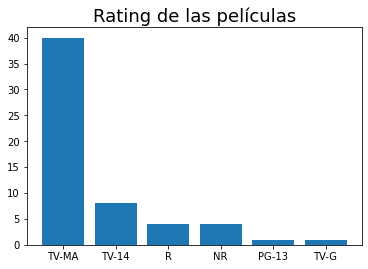

In [ ]:
import matplotlib.pyplot as plt

eje_x=movie_mx.rating.unique()

eje_y=movie_mx['rating'].value_counts() #agrupa y cuenta los valores de los ratings de las películas

plt.title('Rating de las películas',fontsize=18)

plt.bar(eje_x,eje_y)

plt.show()

#https://pythonbros.com/grafica-de-barras-con-matplotlib/